In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from patsy import dmatrices

In [2]:
df = pickle.load(open('households.p', 'rb'))

In [3]:
rows = random.sample(df.index, 20000)
df_sample = df.ix[rows]
df_test = df.drop(rows)


In [4]:
from patsy import dmatrices
y, X = dmatrices('''INTERNET ~ 
                 C(REGION) + 
                 C(ST) + 
                 NP + 
                 C(TYPE) + 
                 C(BATH) +
                 BDSP +
                 C(BLD) + 
                 C(BROADBND) +
                 C(FS) +
                 C(HANDHELD) +
                 C(LAPTOP) +
                 RMSP +
                 C(SINK) +
                 C(STOV) +
                 C(TEL) +
                 C(TEN) +
                 C(YBL) +
                 C(HHL) +
                 C(HHT) +
                 HINCP +
                 C(HUGCL) +
                 C(HUPAC) +
                 C(KIT) +
                 C(LNGI) +
                 C(MULTG) +
                 NOC +
                 C(NPP) +
                 C(NR) +
                 NRC +
                 C(PARTNER) +
                 C(PLM) +
                 C(PSF) +
                 C(R18) +
                 C(R60) +
                 C(R65) +
                 C(SSMC) +
                 C(SVAL) 
                 ''', df_sample, return_type = 'dataframe')



In [5]:
# # Binarize the output
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)
y_train = y_train.ix[:,'INTERNET'].ravel()
X_train = scale(X_train)
X_test = scale(X_test)

In [7]:
def plot_ROC_curve(model, X_train, X_test, y_train, y_test):
    """Function to plot an ROC curve
    Compute ROC curve and ROC area for each class
    Learn to predict each class against the other
    """
    
    # Model Metrics
    print model
    print "*************************** Model Metrics *********************************"
    print 'Accuracy: %s' % cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 5).mean()
    print 'Precision: %s' % cross_val_score(model, X_train, y_train, scoring = 'precision', cv = 5).mean()
    print 'Recall: %s' % cross_val_score(model, X_train, y_train, scoring = 'recall_weighted', cv = 5).mean()
    print 'F1: %s' % cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 5).mean()

    fitted = model.fit(X_train, y_train)
    try:
        y_score = fitted.predict_proba(X_test)[:,1]
    except:
        y_score = fitted.decision_function(X_test)
  
    # Confusion matrix
    print "********************* Normalized Confusion Matrix *************************"
    cm = confusion_matrix(y_test, fitted.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    
    # Classification Report
    print "********************* Classification Report********************************"    
    print classification_report(y_test, fitted.predict(X_test))
    
    print "********************* ROC Curve *******************************************"
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=6, p=2, weights='uniform')
*************************** Model Metrics *********************************
Accuracy: 0.935578518136
Precision: 0.940253613411
Recall: 0.935578518136
F1: 0.966638865606
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.04955752  0.95044248]
 [ 0.00551329  0.99448671]]
********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.36      0.05      0.09       565
        1.0       0.94      0.99      0.97      9069

avg / total       0.91      0.94      0.92      9634

********************* ROC Curve *******************************************


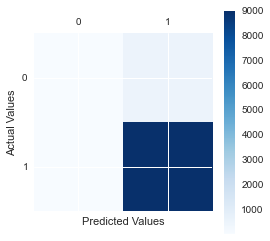

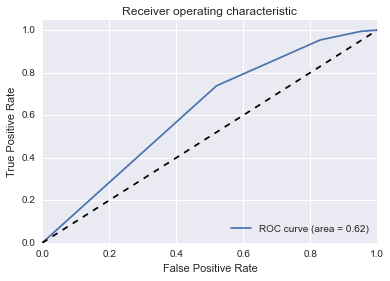

In [15]:
plot_ROC_curve(KNeighborsClassifier(n_neighbors=6), X_train, X_test, y_train, y_test)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
*************************** Model Metrics *********************************
Accuracy: 0.942296678853
Precision: 0.943459176879
Recall: 0.942296678853
F1: 0.97012428661
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.09557522  0.90442478]
 [ 0.00253611  0.99746389]]
********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.70      0.10      0.17       565
        1.0       0.95      1.00      0.97      9069

avg / total       0.93      0.94      0.92      9634

********************* ROC Curve *******************************************


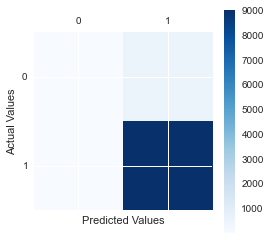

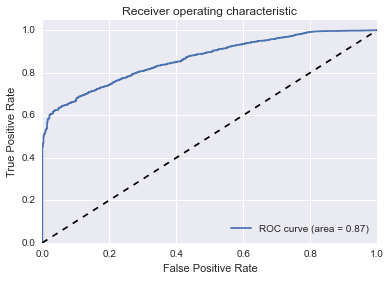

In [16]:
plot_ROC_curve(LogisticRegression(C=0.001), X_train, X_test, y_train, y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
*************************** Model Metrics *********************************
Accuracy: 0.943097410398
Precision: 0.945699935106
Recall: 0.943097410398
F1: 0.97047616183
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.13628319  0.86371681]
 [ 0.00496196  0.99503804]]
********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.63      0.14      0.22       565
        1.0       0.95      1.00      0.97      9069

avg / total       0.93      0.94      0.93      9634

********************* ROC Curve *******************************************


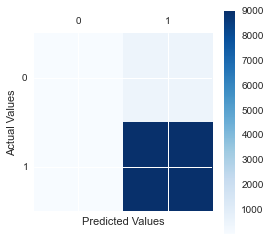

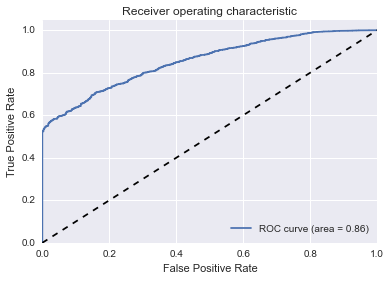

In [13]:
plot_ROC_curve(SVC(C=1), X_train, X_test, y_train, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
*************************** Model Metrics *********************************
Accuracy: 0.924722841932
Precision: 0.95293454731
Recall: 0.924722841932
F1: 0.960196273277
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.26017699  0.73982301]
 [ 0.03462344  0.96537656]]
********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.32      0.26      0.29       565
        1.0       0.95      0.97      0.96      9069

avg / total       0.92      0.92      0.92      9634

********************* ROC Curve *******************************************


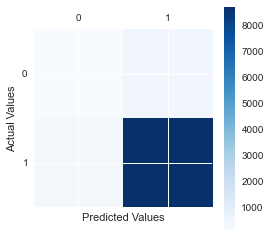

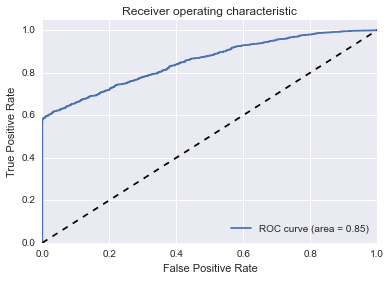

In [12]:
plot_ROC_curve(BernoulliNB(), X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
*************************** Model Metrics *********************************
Accuracy: 0.934466467995
Precision: 0.948768680246
Recall: 0.934599989227
F1: 0.965710081776
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.22477876  0.77522124]
 [ 0.01885544  0.98114456]]
********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.43      0.22      0.29       565
        1.0       0.95      0.98      0.97      9069

avg / total       0.92      0.94      0.93      9634

********************* ROC Curve *******************************************


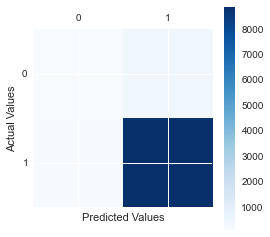

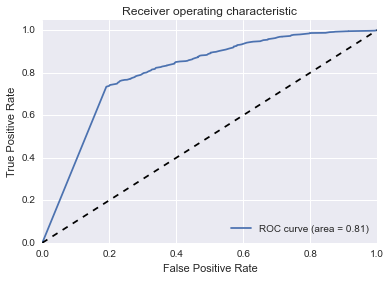

In [22]:
plot_ROC_curve(DecisionTreeClassifier(min_samples_split = 100), X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
*************************** Model Metrics *********************************
Accuracy: 0.940056188882
Precision: 0.942558491724
Recall: 0.939387193112
F1: 0.968785482348
********************* Normalized Confusion Matrix *************************
Normalized confusion matrix
[[ 0.07729469  0.92270531]
 [ 0.00322617  0.99677383]]


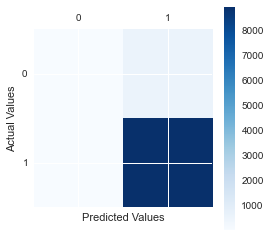

********************* Classification Report********************************
             precision    recall  f1-score   support

        0.0       0.62      0.08      0.14       621
        1.0       0.94      1.00      0.97      8989

avg / total       0.92      0.94      0.91      9610

********************* ROC Curve *******************************************


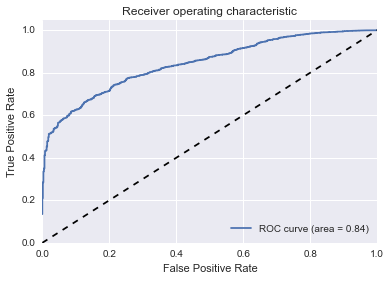

In [12]:
plot_ROC_curve(RandomForestClassifier(n_estimators=5, max_depth=18, min_samples_split=4), X_train, X_test, y_train, y_test)


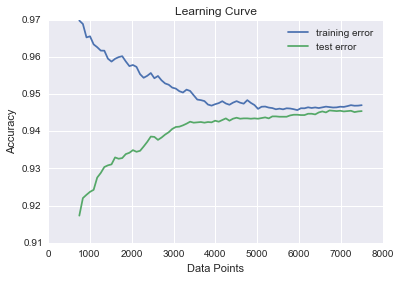

In [109]:
m, train_scores, valid_scores = learning_curve(estimator = LogisticRegression(), 
                                               X = X_train, y = y_train.ravel(), train_sizes = np.linspace(0.1,1.0, 80))

train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)
tr, = plt.plot(m, train_cv_err)
ts, = plt.plot(m, test_cv_err)
plt.legend((tr, ts), ('training error', 'test error'), loc = 'best')
plt.title('Learning Curve')
plt.xlabel('Data Points')
plt.ylabel('Accuracy')

In [9]:
def plot_learning_curve(model):
    m, train_scores, valid_scores = learning_curve(estimator = model, 
                                                   X = X_train, y = y_train.ravel(), train_sizes = np.linspace(0.1,1.0, 80))

    train_cv_err = np.mean(train_scores, axis=1)
    test_cv_err = np.mean(valid_scores, axis=1)
    tr, = plt.plot(m, train_cv_err)
    ts, = plt.plot(m, test_cv_err)
    plt.legend((tr, ts), ('training error', 'test error'), loc = 'best')
    plt.title('Learning Curve')
    plt.xlabel('Data Points')
    plt.ylabel('Accuracy')

In [ ]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5))

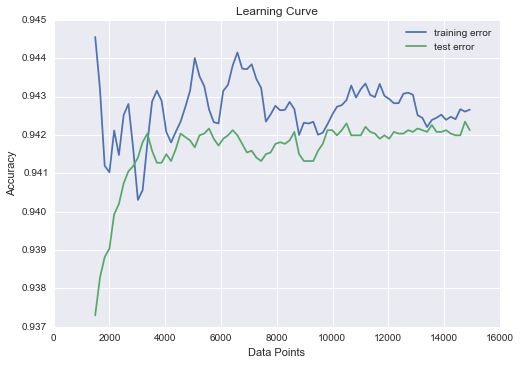

In [10]:
plot_learning_curve(LogisticRegression(C=0.001))

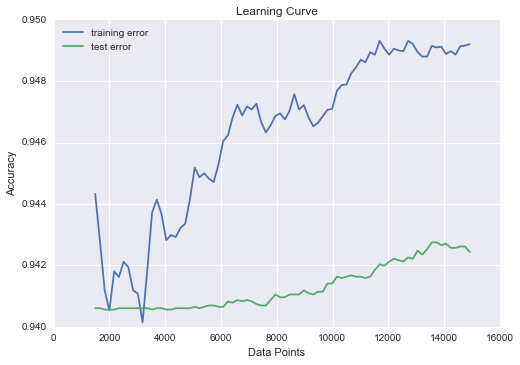

In [11]:
plot_learning_curve(SVC(C=1))

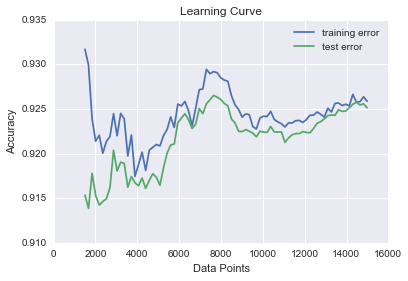

In [19]:
plot_learning_curve(BernoulliNB())

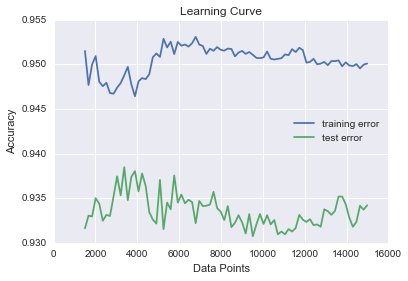

In [21]:
plot_learning_curve(DecisionTreeClassifier(min_samples_split = 100))

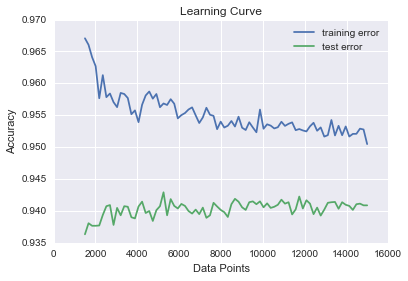

In [23]:
plot_learning_curve(RandomForestClassifier(n_estimators=5, max_depth=18, min_samples_split=4))